In [143]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt


In [144]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [145]:
test_data.duplicated().sum()

0

In [146]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# =========================================

#### France 94215 dan 15572 ta tark etgan
#### Germany 34606 dan 13114 ta tark etgan 
#### Spain 36213 dan 6235 ta tark etgan 

In [147]:
train_data.groupby('Geography')['Exited'].sum()

Geography
France     15572
Germany    13114
Spain       6235
Name: Exited, dtype: int64

In [148]:
train_data.groupby('Geography')['CustomerId'].count()

Geography
France     94215
Germany    34606
Spain      36213
Name: CustomerId, dtype: int64

# =========================================

### Umumiy tar etganlar soni: 34921 ta

In [149]:
train_data['Exited'].sum()

34921

# =========================================

#### Female 71884 dan 20105 tasi tark etgan.
#### Male 93150 dan 14816 tasi tark etgan.

In [150]:
train_data.groupby('Gender')['CustomerId'].count()

Gender
Female    71884
Male      93150
Name: CustomerId, dtype: int64

In [151]:
train_data.groupby('Gender')['Exited'].sum()

Gender
Female    20105
Male      14816
Name: Exited, dtype: int64

# =========================================

In [152]:
train_data = train_data.drop(['CustomerId','id'], axis=1)
test_data = test_data.drop(['CustomerId','id'], axis=1)

# =========================================

### train data

In [153]:
train_data.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


# =========================================

### test data

In [154]:
test_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# =========================================

#### Geography ustunini One-Hot encoding train da

In [155]:
train_data = pd.get_dummies(train_data, columns=['Geography'],dtype=int)

In [156]:
train_data.head(3)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,Okwudilichukwu,668,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0
1,Okwudiliolisa,627,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0
2,Hsueh,678,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0


# =========================================

#### Geography ustunini One-Hot encoding testda

In [157]:
test_data = pd.get_dummies(test_data, columns=['Geography'],dtype=int)

In [158]:
test_data.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,Lucchese,586,Female,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0
1,Nott,683,Female,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0
2,K?,656,Female,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0
3,O'Donnell,681,Male,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0
4,Higgins,752,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0


# =========================================

In [159]:
train_data = pd.get_dummies(train_data, columns=['Gender'], dtype=int)

In [160]:
train_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,Okwudilichukwu,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,Okwudiliolisa,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,Hsueh,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0,0,1


# =========================================

In [161]:
test_data = pd.get_dummies(test_data, columns=['Gender'], dtype=int)

In [162]:
test_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,Lucchese,586,23.0,2,0.0,2,0.0,1.0,160976.75,1,0,0,1,0
1,Nott,683,46.0,2,0.0,1,1.0,0.0,72549.27,1,0,0,1,0
2,K?,656,34.0,7,0.0,2,1.0,0.0,138882.09,1,0,0,1,0


# =========================================

#### Label Encoding to train data

In [163]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Surname'] = label_encoder.fit_transform(train_data['Surname'])

#### Label Encoding to test data

In [164]:
label_encoder_test = LabelEncoder()
test_data['Surname'] = label_encoder_test.fit_transform(test_data['Surname'])

#### train data

In [165]:
train_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1924,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1925,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,1178,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0,0,1


#### test data

In [166]:
test_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1482,586,23.0,2,0.0,2,0.0,1.0,160976.75,1,0,0,1,0
1,1812,683,46.0,2,0.0,1,1.0,0.0,72549.27,1,0,0,1,0
2,1246,656,34.0,7,0.0,2,1.0,0.0,138882.09,1,0,0,1,0


# =========================================

In [167]:
train_data['Surname'].max()

2796

In [168]:
test_data['Surname'].max()

2707

# =========================================

In [169]:
train_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1924,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1925,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,1178,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0,0,1


In [170]:
spearman_corr = train_data['Surname'].corr(train_data['Exited'], method='spearman')
spearman_corr

-0.030965937850184658

##### 4. Point-Biserial Korrelyatsiyasi. Bu korrelyatsiya bitta binary (0/1) va bitta uzluksiz o'zgaruvchi orasidagi bog'liqlikni o'lchaydi.

In [171]:
from scipy.stats import pointbiserialr
point_biserial_corr, p_value = pointbiserialr(train_data['EstimatedSalary'], train_data['Exited'])
point_biserial_corr,p_value

(0.018826805670812893, 2.0271773711872926e-14)

In [172]:
point_biserial_corr, p_value = pointbiserialr(train_data['CreditScore'], train_data['Exited'])
point_biserial_corr,p_value

(-0.027382600061651705, 9.373557251575114e-29)

In [173]:
point_biserial_corr, p_value = pointbiserialr(train_data['Age'], train_data['Exited'])
point_biserial_corr,p_value

(0.34076816340758004, 0.0)

In [174]:
point_biserial_corr, p_value = pointbiserialr(train_data['Surname'], train_data['Exited'])
point_biserial_corr,p_value

(-0.02832794119524689, 1.1710824956029132e-30)

#### 5. Phi-Koeffitsienti. Phi-koeffitsienti ikkita binary ustun orasidagi bog'liqlikni o'lchash uchun ishlatiladi.

In [175]:
train_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1924,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1925,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,1178,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0,0,1


In [176]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['Gender_Male'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.14642659893297552, 0.0)

In [177]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['Gender_Female'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.14642659893297552, 0.0)

In [178]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['Geography_Spain'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.05115724287873842, 6.257273553585017e-96)

In [179]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['Geography_Germany'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.21103550522618586, 0.0)

In [180]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['Geography_France'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.13078207019867738, 0.0)

In [181]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['IsActiveMember'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.2102221903450902, 0.0)

In [182]:
from math import sqrt
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['HasCrCard'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.022124110993038487, 2.522692566848195e-19)

In [183]:
contingency_table = pd.crosstab(train_data['Balance'], train_data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coeff = sqrt(chi2 / train_data.shape[0])
phi_coeff,p

(0.4903894497599363, 7.052625024298229e-279)

In [184]:
X_train = train_data.drop('Exited', axis=1)  
y_train = train_data['Exited']  

X_test = test_data  

In [185]:
train_data.head(3)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1924,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1925,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,1178,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0,0,1


In [186]:
test_data.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1482,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,1812,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,1246,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,1832,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,1079,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1


In [187]:
X=train_data.drop(columns=['Exited'])
y=train_data['Exited']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  
    ('scaler', StandardScaler()),  
    ('log_reg', LogisticRegression(max_iter=1000)) 
])

pipeline.fit(X_train, y_train)

y_train_pred_prob = pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"Train ROC AUC Score: {train_roc_auc:.4f}")

y_test_pred_prob = pipeline.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")


Train ROC AUC Score: 0.8795
Test ROC AUC Score: 0.8816


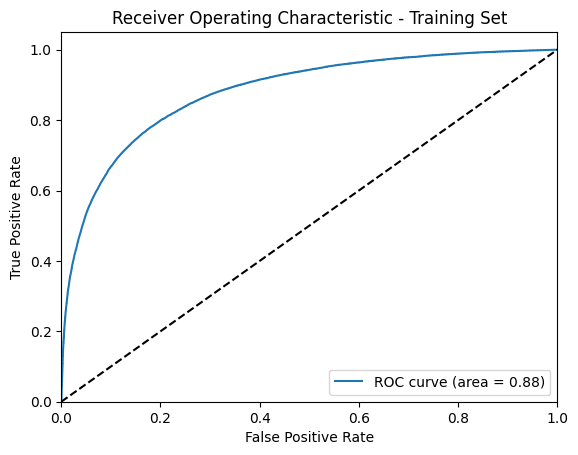

In [189]:

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Training Set')
plt.legend(loc="lower right")
plt.show()

In [190]:
y_train_pred_prob = pipeline.predict_proba(test_data)[:, 1]

In [191]:
pd.read_csv('sample_submission.csv')


,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [192]:
y_train_pred_prob

array([0.01212196, 0.7949276 , 0.05699755, ..., 0.02057963, 0.18114974,
       0.27880911])

In [194]:
subm_3=pd.read_csv('sample_submission.csv')
subm_3['Exited']=y_train_pred_prob
subm_3.to_csv('last_sumbission.csv', index=False)